# <span style="color:#ffc509"> Importamos Librerias </span>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os





In [1]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

NameError: name 'pd' is not defined

In [6]:
#configurar estilo de visualizaciones 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [11]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
clean_csv_path = os.path.join(data_dir, "clean_anime.csv")

df_clean_anime = pd.read_csv(clean_csv_path)

In [13]:
print(df_clean_anime.head())

   anime_id                                                               anime_url                                                 image_url                                name                      english_name              japanese_names  score                             genres                      themes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [15]:
#informacion sobre tipos de datos y valores nulos
df_clean_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14966 entries, 0 to 14965
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          14966 non-null  int64  
 1   anime_url         14966 non-null  object 
 2   image_url         14966 non-null  object 
 3   name              14966 non-null  object 
 4   english_name      14966 non-null  object 
 5   japanese_names    14921 non-null  object 
 6   score             14966 non-null  float64
 7   genres            13372 non-null  object 
 8   themes            9900 non-null   object 
 9   synopsis          14500 non-null  object 
 10  type              14966 non-null  object 
 11  episodes          14966 non-null  float64
 12  premiered         4679 non-null   object 
 13  producers         9558 non-null   object 
 14  studios           12596 non-null  object 
 15  source            14966 non-null  object 
 16  duration          14966 non-null  object

In [14]:
#estadisticas descriptivas basicas 
df_clean_anime.describe()

,anime_id,score,episodes,rank,popularity,favorites,scored_by,members,premiered_year
count,14966.000000,14966.000000,14966.000000,11898.000000,14966.000000,14966.000000,1.496600e+04,1.496600e+04,4679.000000
mean,25662.122344,6.673171,12.616999,5949.588082,8484.234131,805.460043,3.596360e+04,7.039765e+04,2008.620218
std,19278.815543,0.703460,50.167679,3435.096612,5483.922091,6112.912237,1.323201e+05,2.207667e+05,13.291854
min,1.000000,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,1.810000e+02,1961.000000
25%,5832.250000,6.110000,1.000000,2969.250000,3848.250000,2.000000,5.290000e+02,1.600000e+03,2003.000000
50%,27670.000000,6.580000,2.000000,5949.500000,7908.500000,11.000000,2.508000e+03,6.769000e+03,2012.000000
75%,40782.250000,7.170000,12.000000,8923.750000,12578.750000,93.000000,1.537750e+04,3.815325e+04,2018.000000
max,61134.000000,9.310000,3057.000000,11909.000000,21869.000000,234514.000000,2.906007e+06,4.117781e+06,2025.000000


In [27]:
#identificar dimensiones del dataset
print(f"el dataset tiene {df.shape[0]}filas y {df.shape[1]}columnas")

el dataset tiene 14966filas y 24columnas


In [16]:
#cantidades de valores nulos por columna
df_clean_anime.isnull().sum()

anime_id                0
anime_url               0
image_url               0
name                    0
english_name            0
japanese_names         45
score                   0
genres               1594
themes               5066
synopsis              466
type                    0
episodes                0
premiered           10287
producers            5408
studios              2370
source                  0
duration                0
rating                 68
rank                 3068
popularity              0
favorites               0
scored_by               0
members                 0
premiered_season        0
premiered_year      10287
dtype: int64

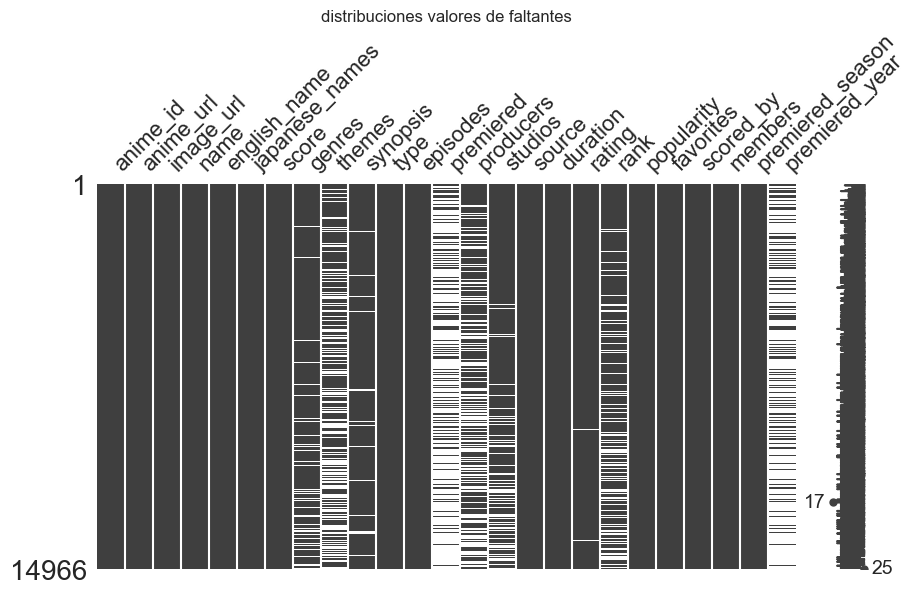

In [17]:
#visualizacion de valores faltantes
msno.matrix(df_clean_anime , figsize=(10,5))
plt.title('distribuciones valores de faltantes')
plt.show()

In [19]:
#porcentaje de valores faltantes
missing_percent = df_clean_anime.isnull().sum() /len(df_clean_anime) * 100
print(missing_percent)

anime_id             0.000000
anime_url            0.000000
image_url            0.000000
name                 0.000000
english_name         0.000000
japanese_names       0.300682
score                0.000000
genres              10.650808
themes              33.850060
synopsis             3.113724
type                 0.000000
episodes             0.000000
premiered           68.735801
producers           36.135240
studios             15.835895
source               0.000000
duration             0.000000
rating               0.454363
rank                20.499800
popularity           0.000000
favorites            0.000000
scored_by            0.000000
members              0.000000
premiered_season     0.000000
premiered_year      68.735801
dtype: float64


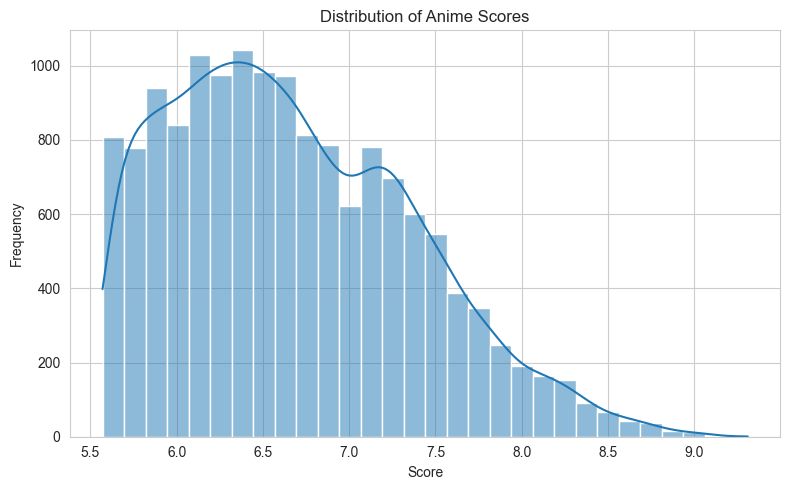

In [27]:
# Histogram: Distribution of Anime Scores
plt.figure(figsize=(8, 5))
sns.histplot(df_clean_anime['score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


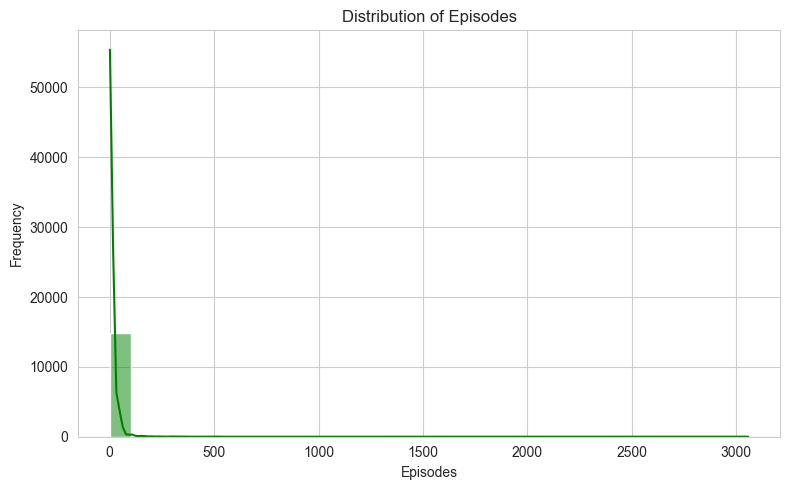

In [28]:
# Histogram: Distribution of the number of Episodes (where available)
plt.figure(figsize=(8, 5))
sns.histplot(df_clean_anime['episodes'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17960\3617593381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df_clean_anime, palette="husl")  # Puedes probar "coolwarm", "Set2", "pastel", etc.


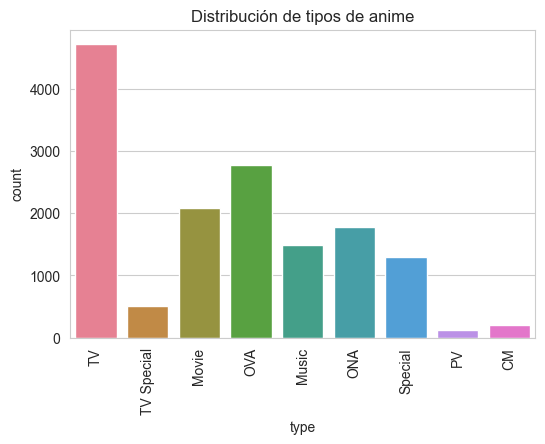

In [29]:
# Count Plot: Distribution of 'type' (e.g., TV, OVA, Movie)
sns.countplot(x="type", data=df_clean_anime, palette="husl")  # Puedes probar "coolwarm", "Set2", "pastel", etc.
plt.title("Distribución de tipos de anime")
plt.xticks(rotation=90)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17960\1851451380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_clean_anime, order=df_clean_anime['rating'].value_counts().index, palette="coolwarm")


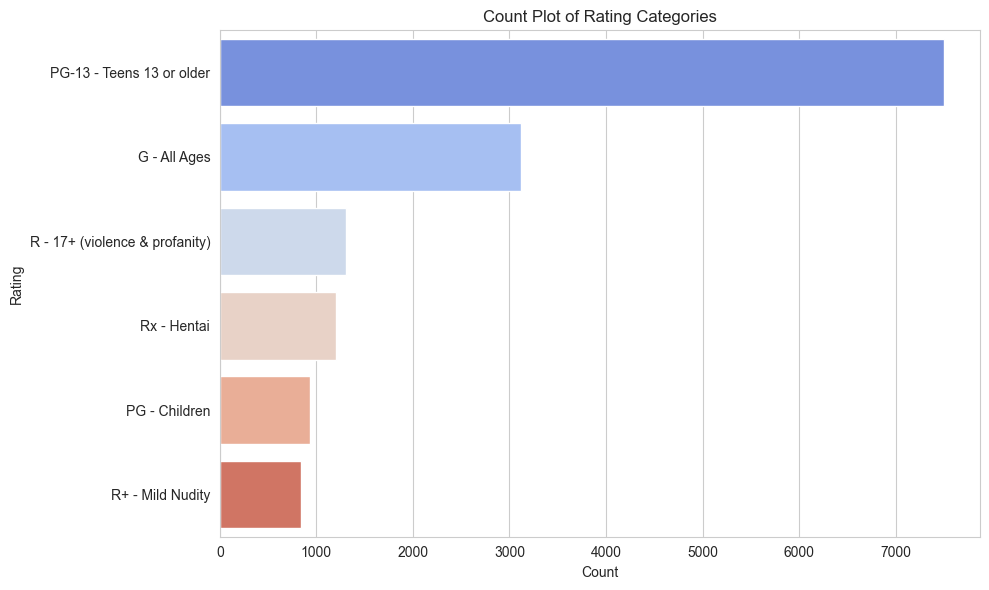

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df_clean_anime, order=df_clean_anime['rating'].value_counts().index, palette="coolwarm")
plt.title('Count Plot of Rating Categories')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [35]:
df_clean_anime.columns

Index(['anime_id', 'anime_url', 'image_url', 'name', 'english_name',
       'japanese_names', 'score', 'genres', 'themes', 'synopsis', 'type',
       'episodes', 'premiered', 'producers', 'studios', 'source', 'duration',
       'rating', 'rank', 'popularity', 'favorites', 'scored_by', 'members',
       'premiered_season', 'premiered_year'],
      dtype='object')

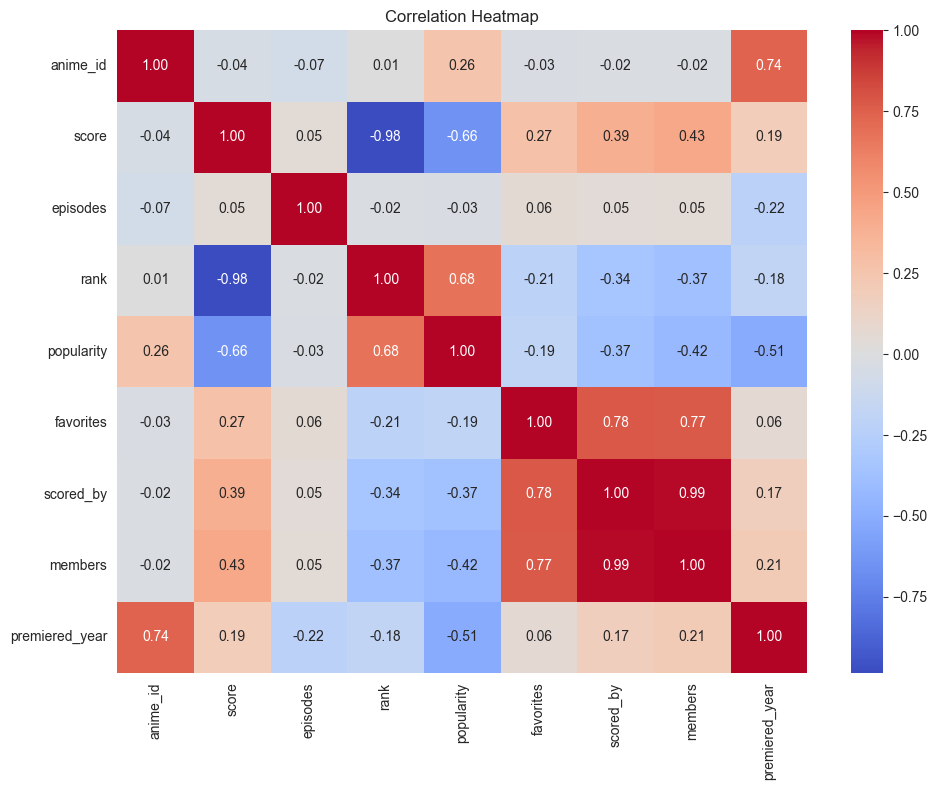

In [39]:
# matriz de correlacion
numeric_df_clean_anime = df_clean_anime.select_dtypes(include=[np.number])
if numeric_df_clean_anime.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df_clean_anime.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes características numéricas para un mapa de calor de correlación")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17960\1653104473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


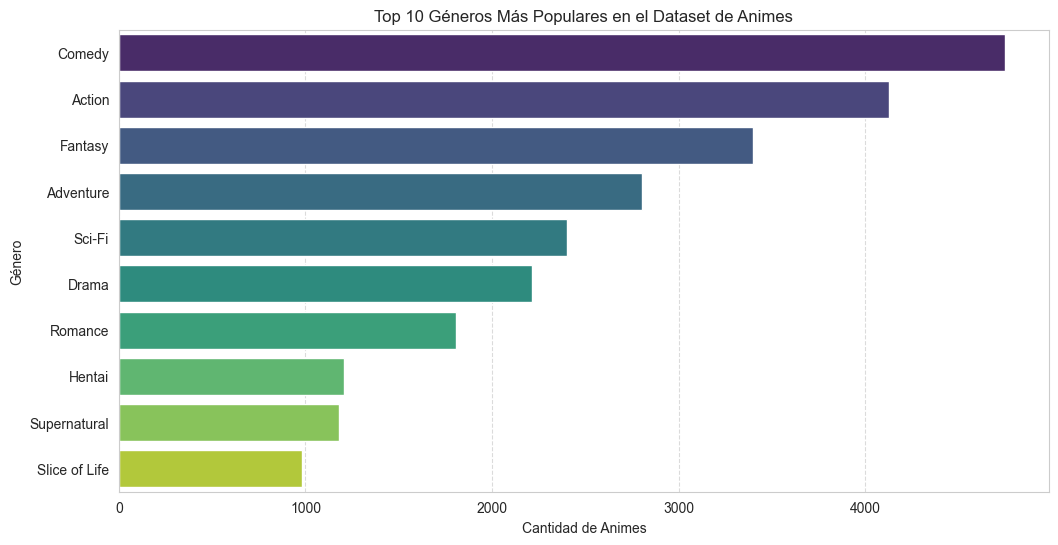

In [40]:
genre_counts = df_clean_anime["genres"].dropna().str.split(", ").explode().value_counts().head(10)

# Graficar los géneros más populares
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.xlabel("Cantidad de Animes")
plt.ylabel("Género")
plt.title("Top 10 Géneros Más Populares en el Dataset de Animes")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#**Histogramas (diagonal)**:
   - Muestran cómo se distribuyen los valores de cada variable.
   - Ejemplo: Si `score` tiene forma de campana, significa que hay muchos animes con puntuación media y pocos con puntuación muy alta o muy baja.

2. **Gráficos de dispersión (celdas no diagonales)**:
   - Muestran relaciones entre dos variables.
   - Ejemplo: 
     - Si `score` vs `rank` muestra una **nube descendente**, indica que animes con mejor puntuación (`score` alto) tienden a tener mejor posición en el ranking (`rank` bajo, porque rank 1 es el mejor).
     - Si `episodes` vs `popularity` no muestra patrón claro, significa que no hay relación evidente entre la cantidad de episodios y la popularidad.


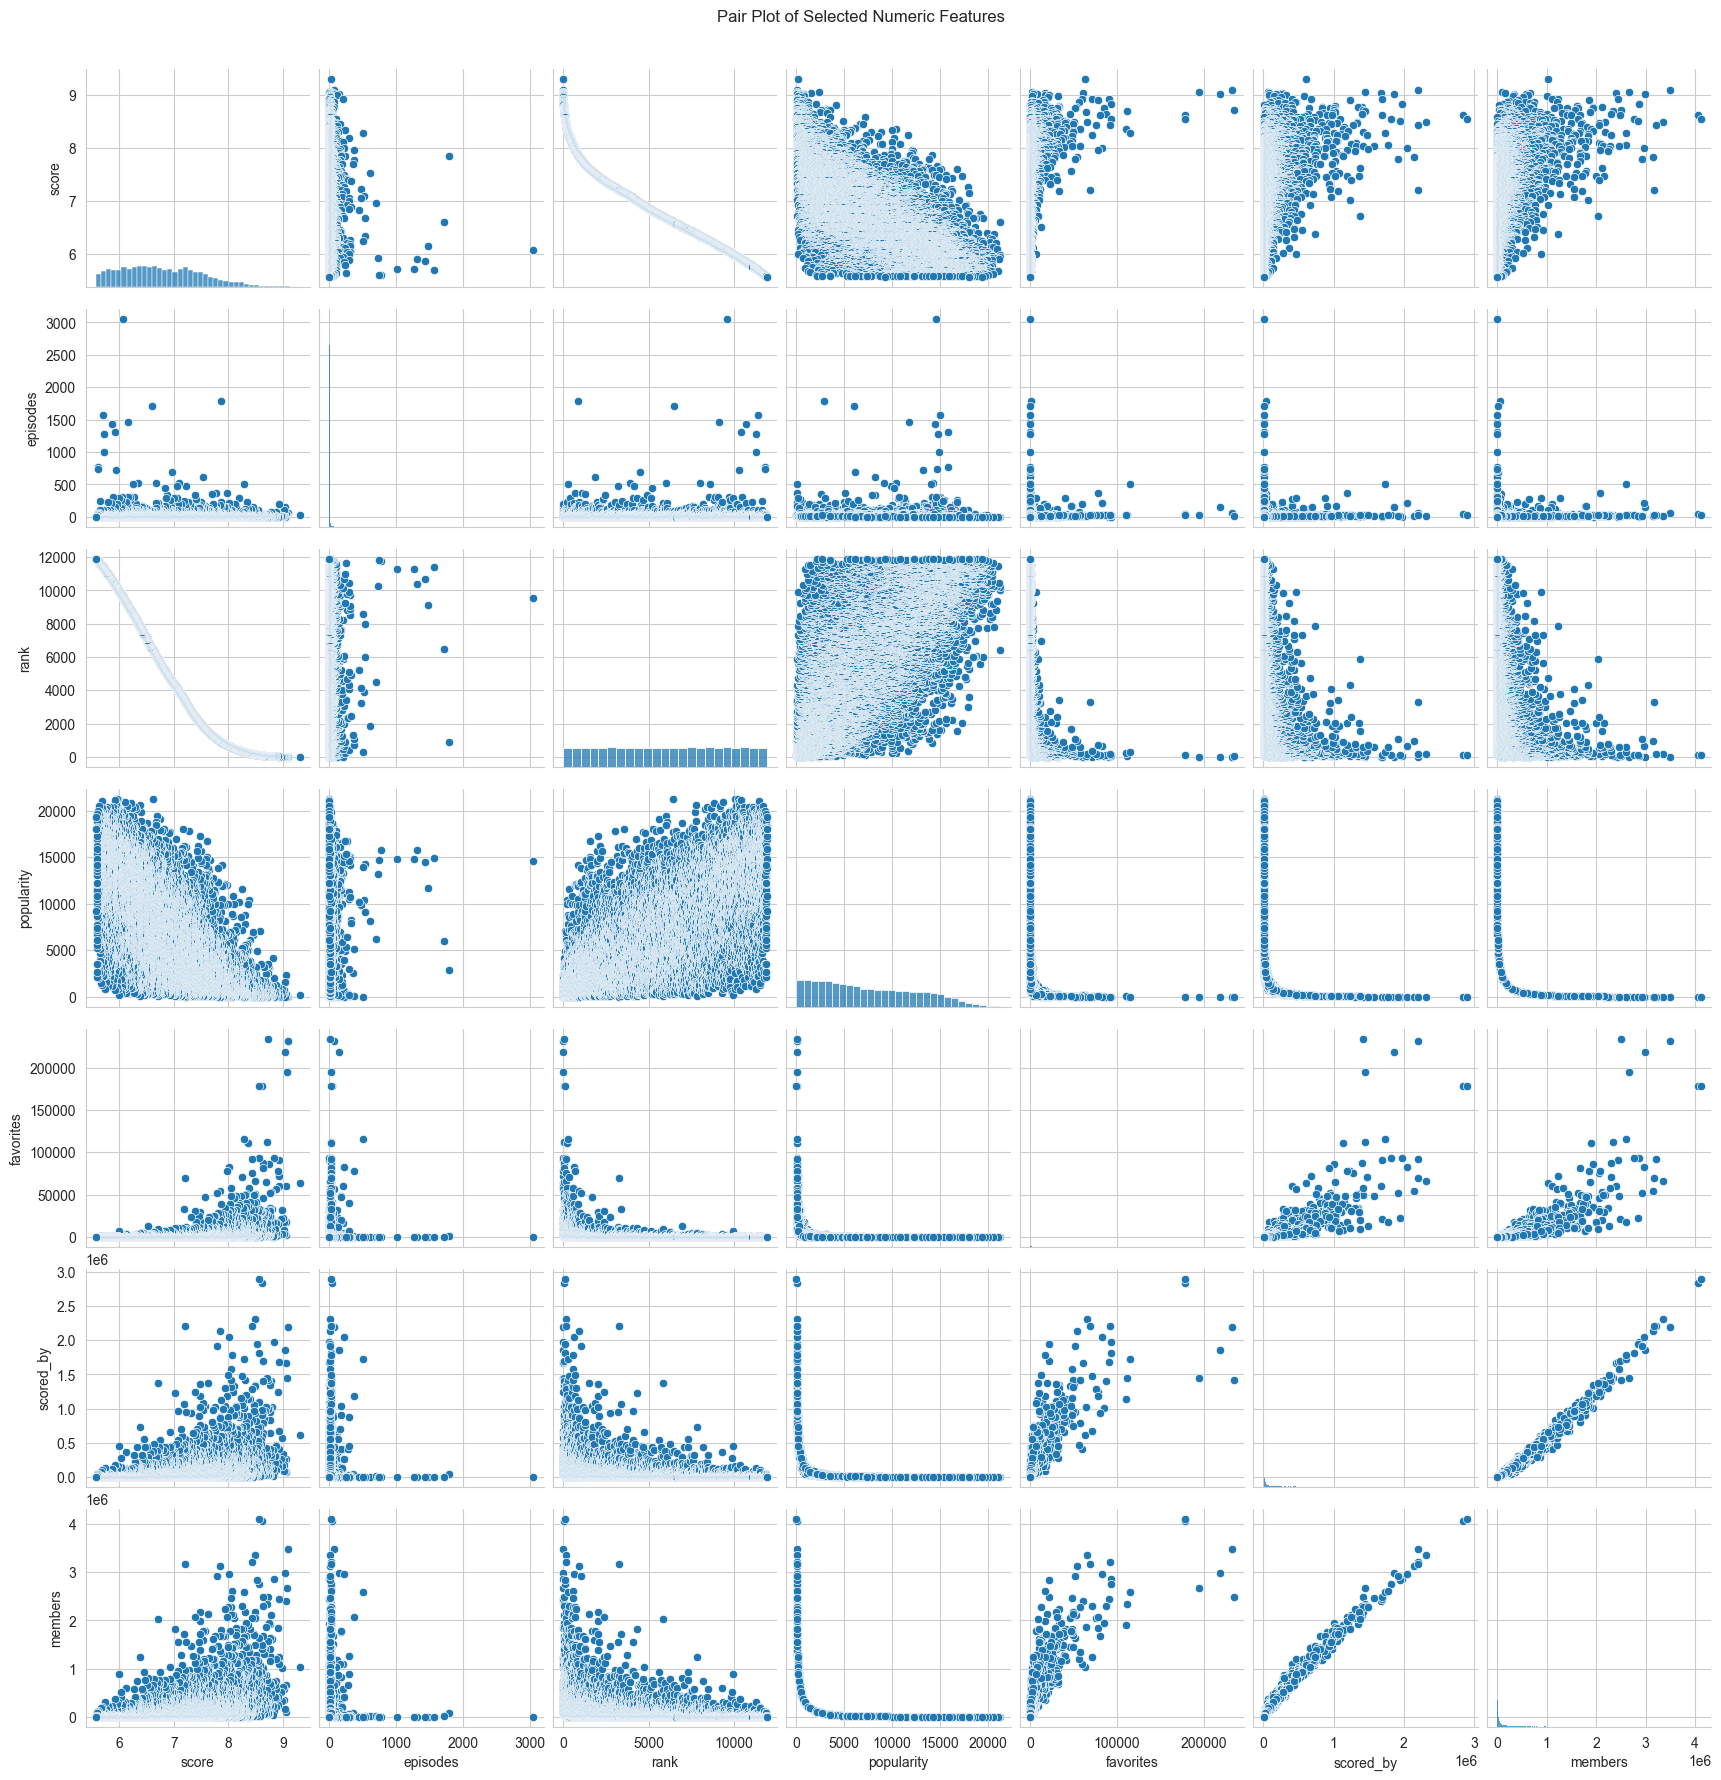

In [41]:
# Create a pairplot for selected numeric features for more detailed pairwise relationships
select_cols = ['score', 'episodes', 'rank', 'popularity', 'favorites', 'scored_by', 'members']
existing_cols = [col for col in select_cols if col in df_clean_anime.columns]

if len(existing_cols) >= 4:
    sns.pairplot(df_clean_anime[existing_cols].dropna())
    plt.suptitle('Pair Plot of Selected Numeric Features', y=1.02)
    plt.show()
else:
    print("Not enough selected numeric columns to generate a pair plot.")

# Graficas de Regresión lineal
# Este código entrena y evalúa un modelo de regresión lineal para predecir la puntuación (score) de un anime basado en varias características. Aquí te explico como interpretar la grafica 

Esta gráfica representa la comparación entre los **valores reales** y los **valores predichos** por el modelo de regresión lineal.

### **¿Cómo interpretar la gráfica?**  
1. **Ejes**:
   - **Eje X (horizontal):** Representa las puntuaciones reales (`Actual Scores`) de los animes.
   - **Eje Y (vertical):** Representa las puntuaciones predichas (`Predicted Scores`) por el modelo.

2. **Puntos azules**:
   - Cada punto representa un anime en el conjunto de prueba.
   - La coordenada de cada punto \((x, y)\) indica que un anime con una **puntuación real** de \( x \) ha sido **predicho** con una puntuación \( y \).

3. **Línea roja discontinua**:
   - Es la **línea ideal** \( y = x \), donde las predicciones coincidirían perfectamente con los valores reales.
   - Cuanto más cerca están los puntos de esta línea, mejor es la precisión del modelo.



 

Training data shape: (9518, 6)
Testing data shape: (2380, 6)
Training data shape: (9518, 6)
Testing data shape: (2380, 6)
Mean Squared Error (MSE): 0.014
R^2 Score: 0.973


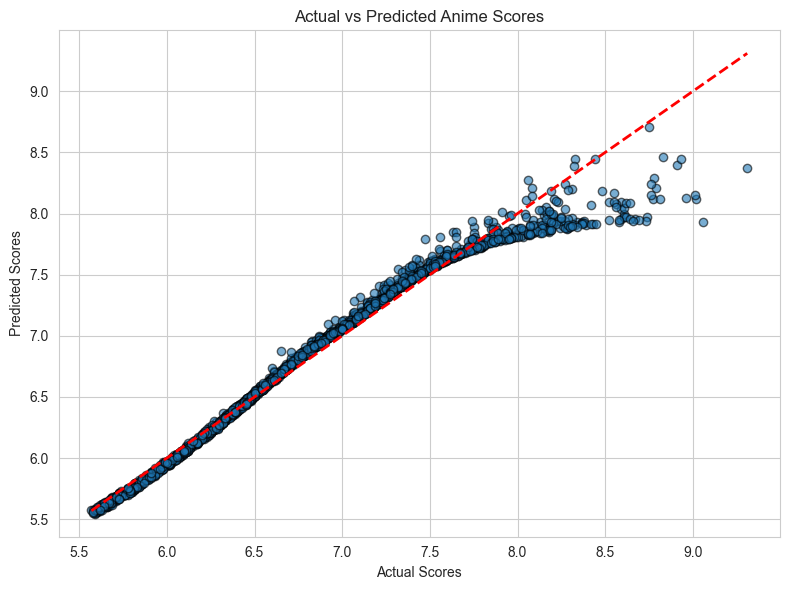

In [42]:
# Define feature columns and target column for prediction
predictor_features = ['episodes', 'rank', 'popularity', 'favorites', 'scored_by', 'members']
target = 'score'

# Check if the required features exist in the dataset
for feat in predictor_features + [target]:
    if feat not in df_clean_anime.columns:
        raise ValueError(f"Required column {feat} is not in the dataset. Check data integrity.")

# Prepare the data for modeling by dropping rows with missing values in the specified columns
model_df_clean_anime = df_clean_anime[predictor_features + [target]].dropna()

# Split data into training and testing subsets
X = model_df_clean_anime[predictor_features]
y = model_df_clean_anime[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)    

# Prepare the data for modeling by dropping rows with missing values in the specified columns
model_df_clean_anime = df_clean_anime[predictor_features + [target]].dropna()

# Split data into training and testing subsets
X = model_df_clean_anime[predictor_features]
y = model_df_clean_anime[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


# Initialize and fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.title('Actual vs Predicted Anime Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17960\3179151244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_animes['name'], x=top_animes['favorites'], palette="viridis")


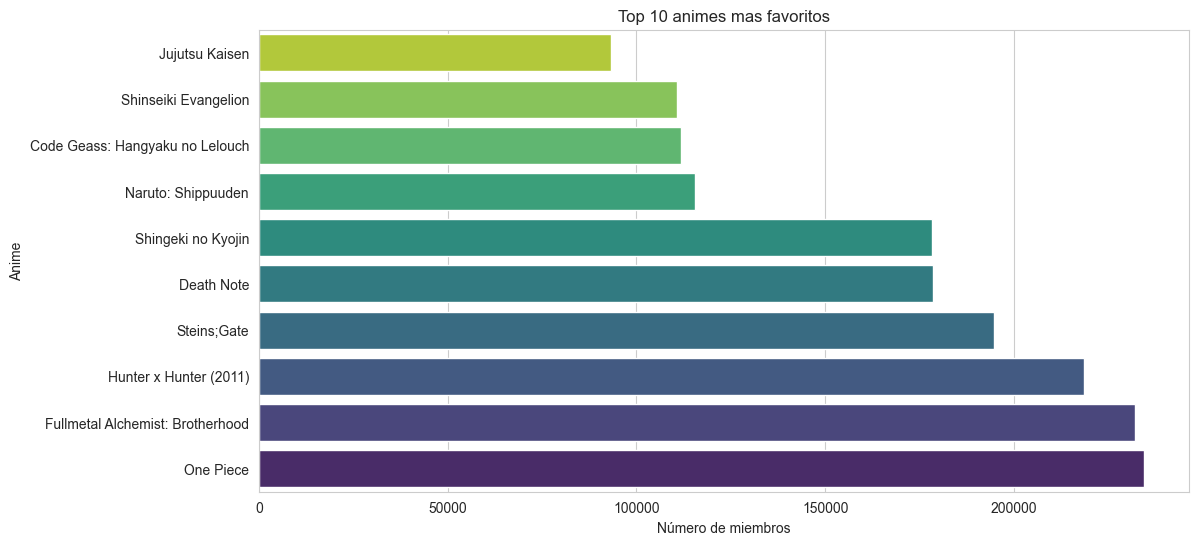

In [ ]:
# Seleccionar los 20 animes más vistos según la cantidad de miembros
top_animes = df_clean_anime.nlargest(10, 'favorites')


# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y=top_animes['name'], x=top_animes['favorites'], palette="viridis")

# Personalizar etiquetas y título
plt.xlabel("Número de miembros")
plt.ylabel("Anime")
plt.title("Top 10 animes mas favoritos")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el más visto esté arriba
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17960\2640534889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_longest_animes['name'], x=top_longest_animes['episodes'], palette="magma")


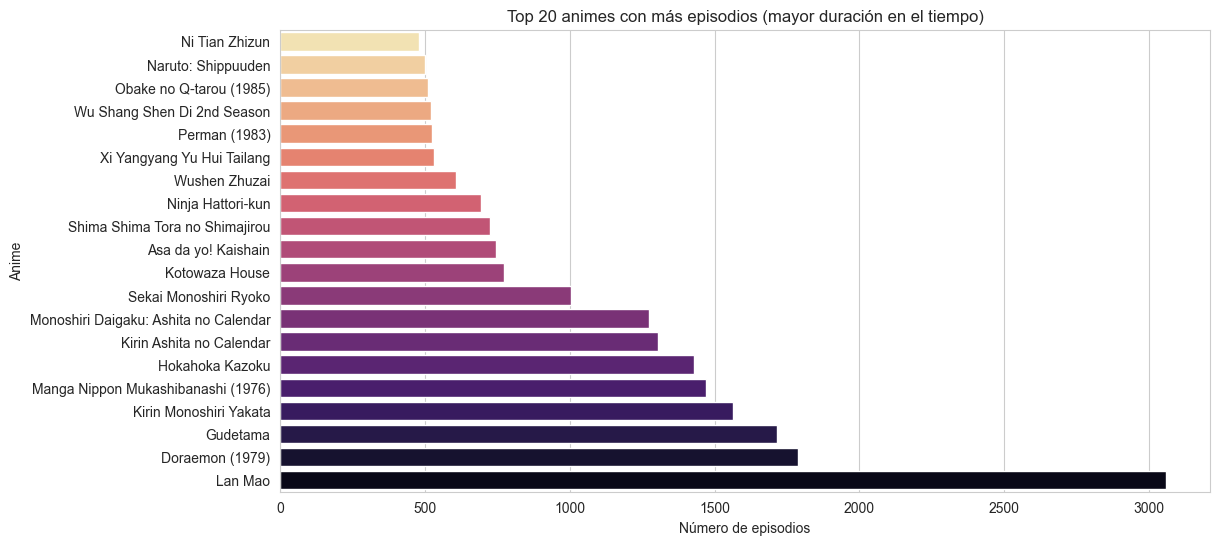

In [52]:
top_longest_animes = df_clean_anime.nlargest(20, 'episodes')

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y=top_longest_animes['name'], x=top_longest_animes['episodes'], palette="magma")

# Personalizar etiquetas y título
plt.xlabel("Número de episodios")
plt.ylabel("Anime")
plt.title("Top 20 animes con más episodios (mayor duración en el tiempo)")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el de mayor duración esté arriba
plt.show()